# Nithiyaluxmy Kumarasamy 
#Python Project 
instructor : Mr. Vijay Kumar
Data Science 
Metro College of Technology

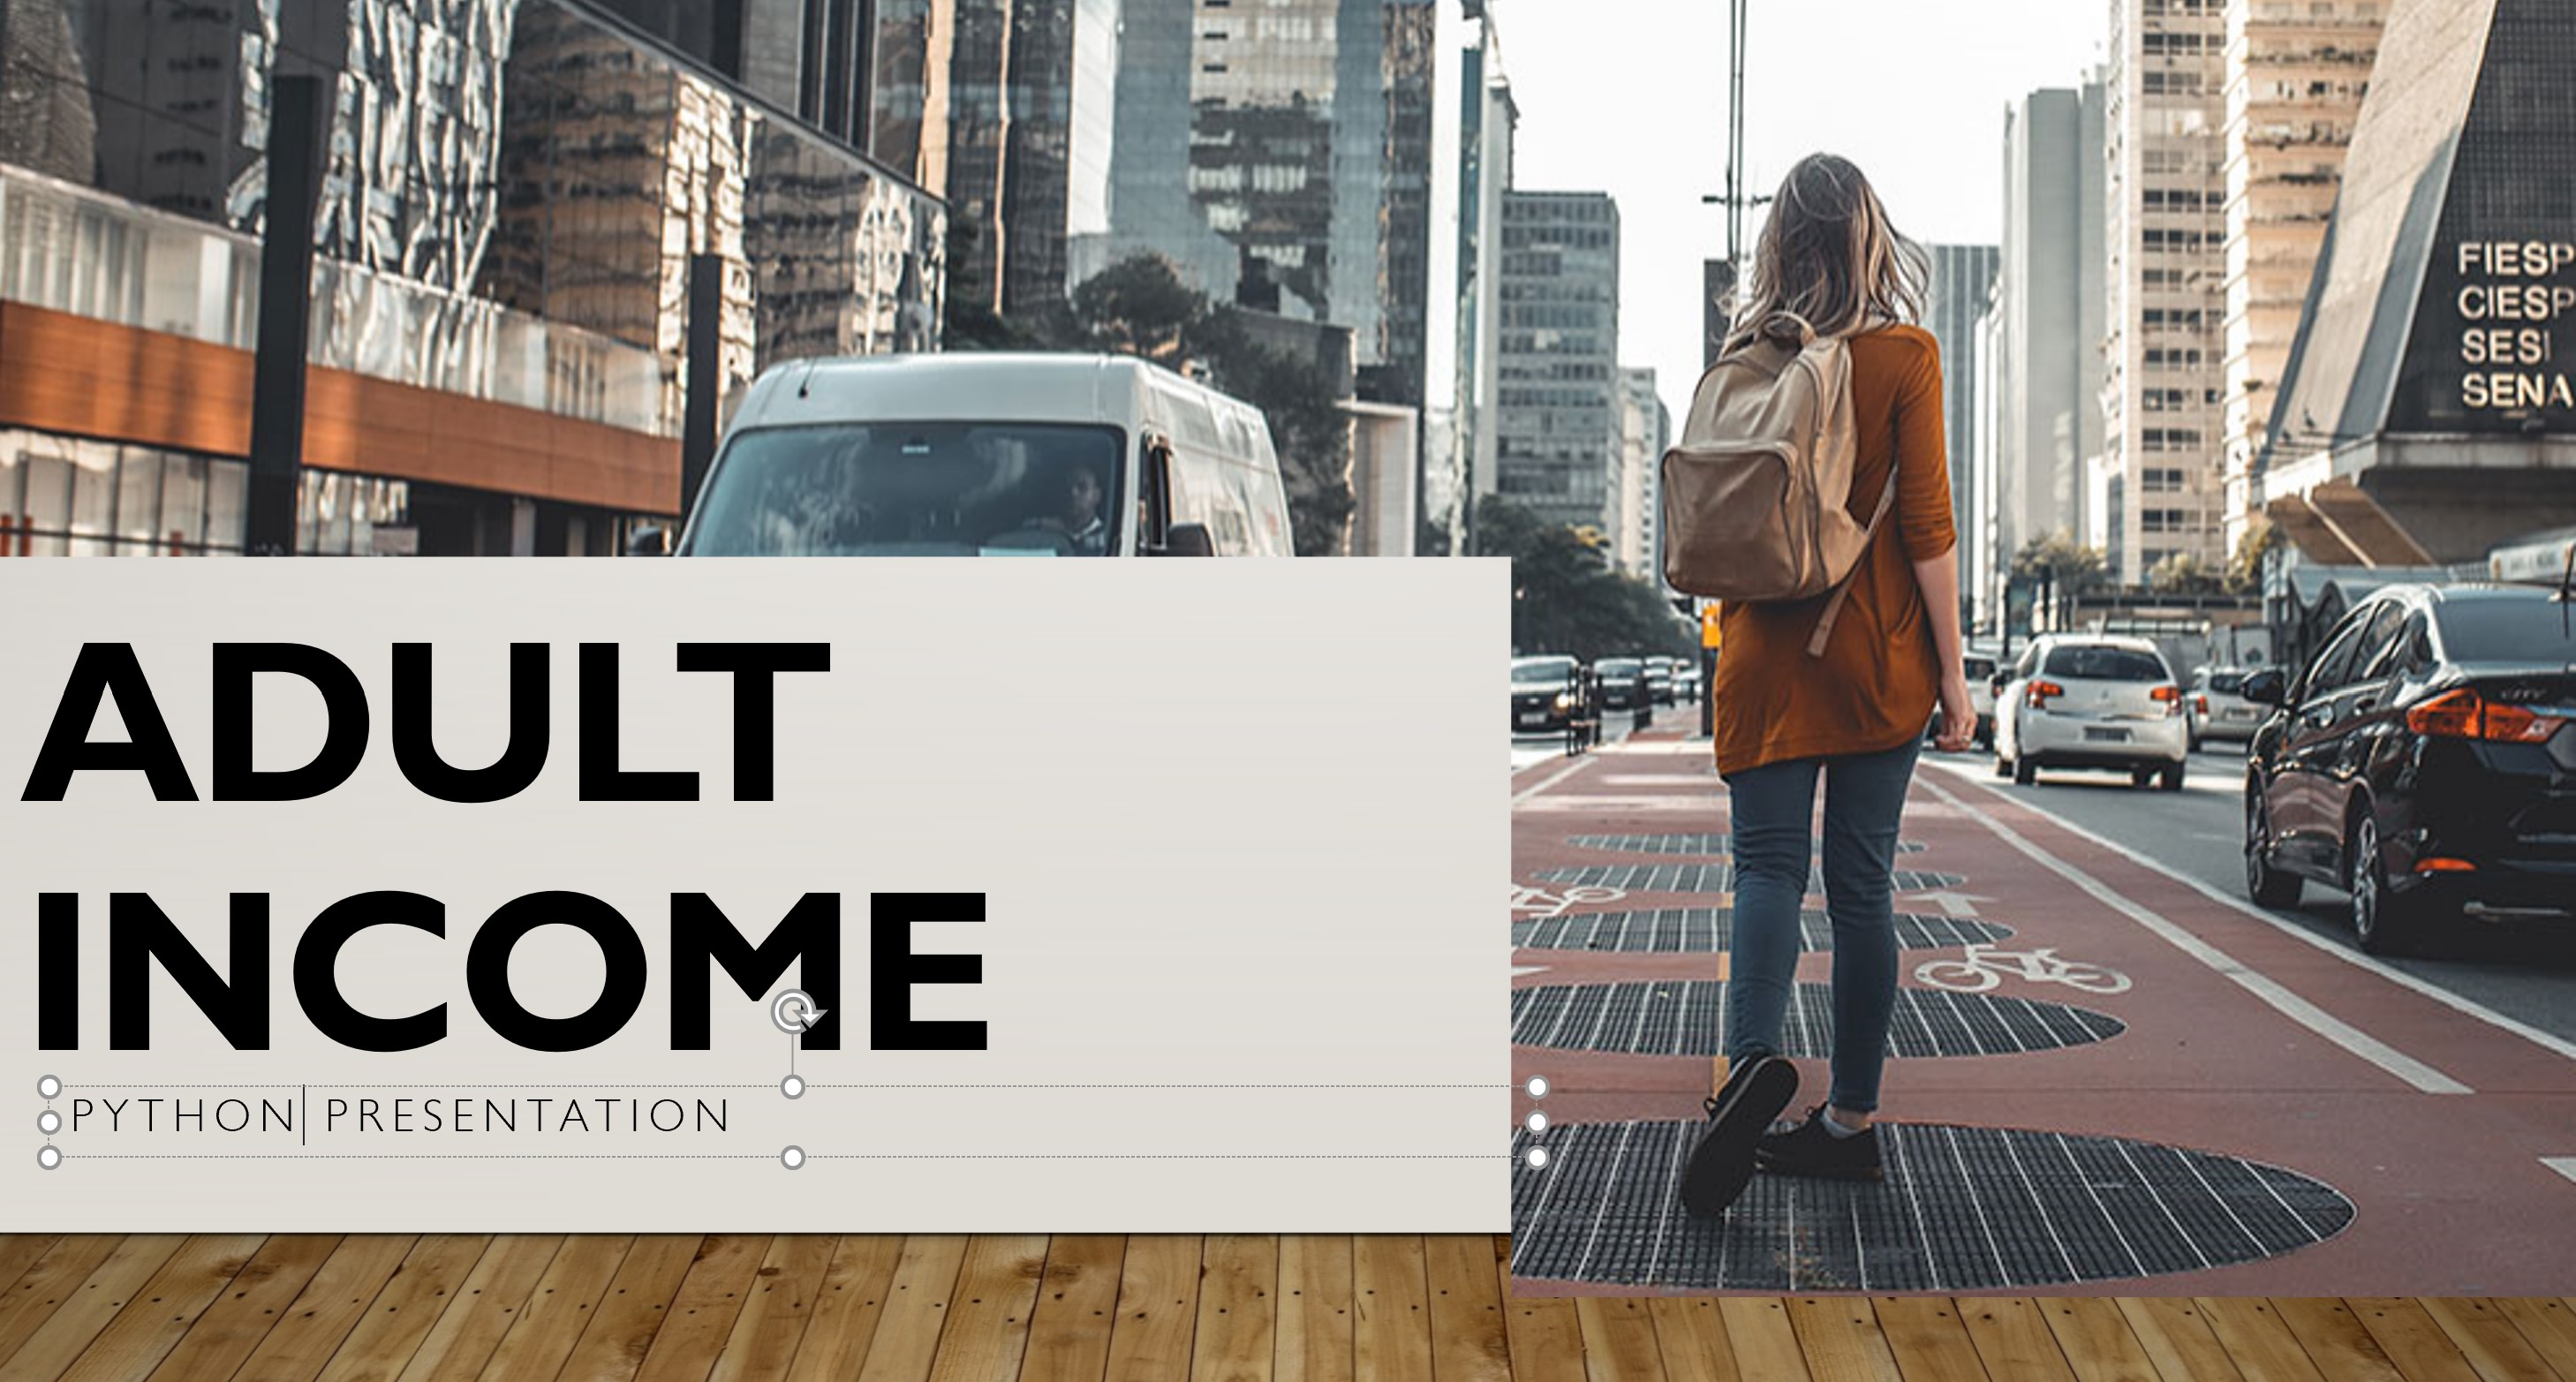

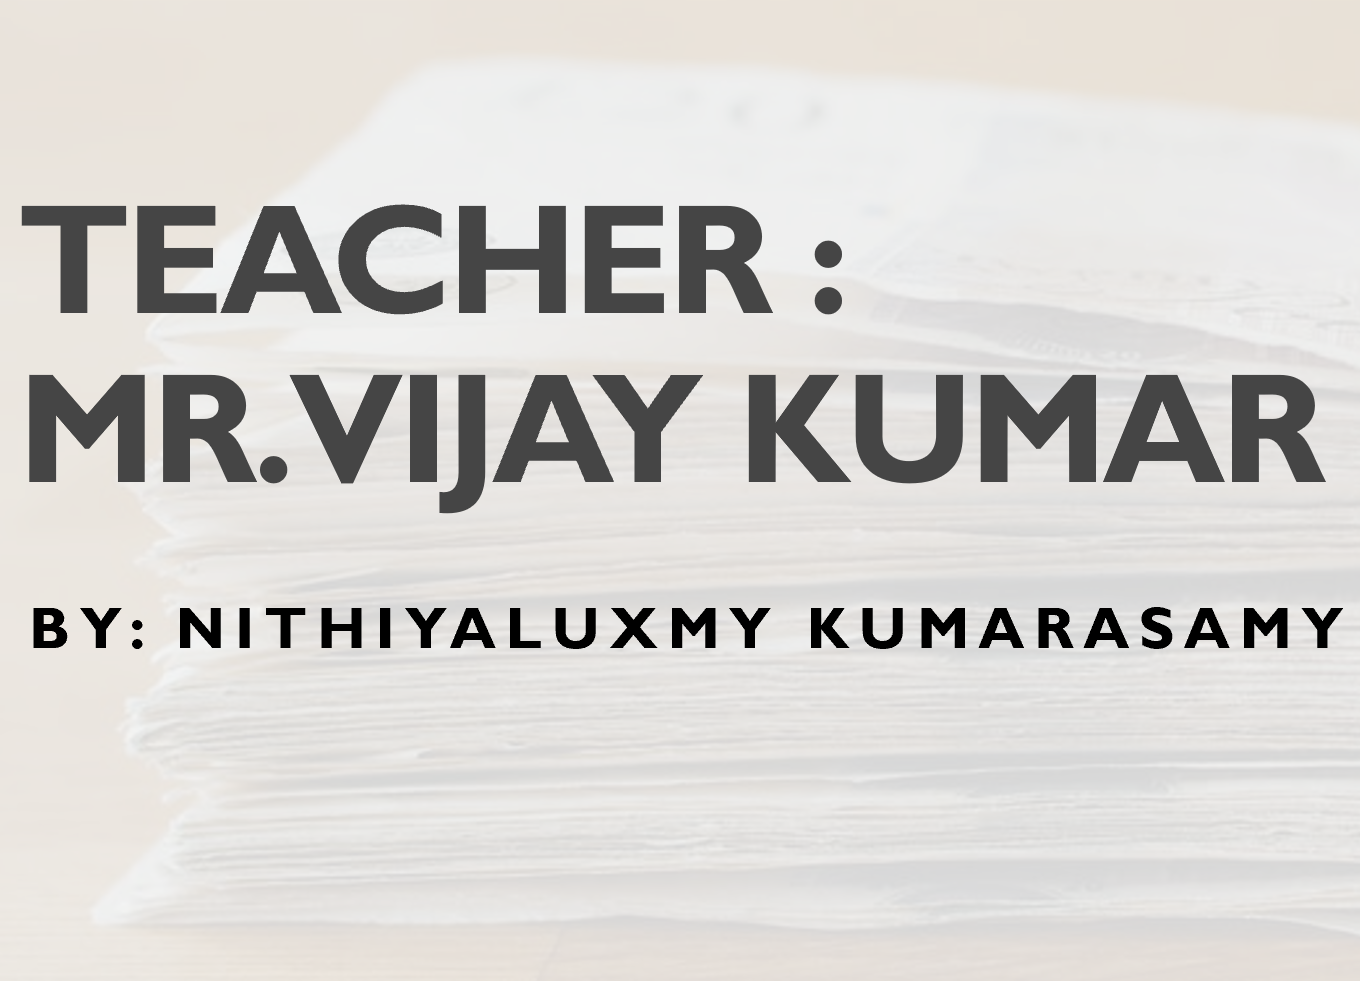

# Aim of this project is Predicting personal income over 50K a year or Not.

Objective:
            This project is to predict if an individual’s income exceeds 50K or not using machine learning classification algorithms and also finding patters in the dataset using Association rules. This helps us to determine various things such as setting up a new business in a city based on average income, Real Estate preferences or bank loan eligibility for a particular person can predict in future.

# About the Dataset
Age: Describes the age of individuals. Continuous.
Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: Continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: Number of years spent in education. Continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: Continuous.
capital-loss: Continuous.
hours-per-week: Continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
salary: >50K,<=50K

# Problem Statement/Hypothesis

Good data analysis project is all about asking questions, in this notebook we are goinig to answer the following questions:

    
    QUESTIONS:
    * DO MEN OR WOMEN EARN MORE? AND IS GENDER AFFECT THE EARNING CAPACITY?
    *.DOES AGE and RACE ANY AFFECT EARNING CAPACITY?
    *.WHAT ELSE AFFECT?
    *.WHAT PREDICTION MODEL IS GOOD?
    
    This analysis helps us to determine various things such as setting up a new business in a city based on average income, Real     Estate preferences or bank loan eligibility for a particular person can predict in future

    



Data fields :age	capital-gain	capital-loss	education	educational-num	fnlwgt	gender	hours-per-week	income_>50K	marital-status	native-country	occupation	race	relationship	source	workclass

Good data analysis project is all about asking questions, in this notebook we are goinig to answer the following questions:
Do men or women speed more often?
Does gender affect who gets searched during a stop?
During a search, how often is the driver frisked?
Which year had the least number of stops?
How does drug activity change by time of day?
Do most stops occur at night?

# Creating/Changing Working  library

In [1]:
import os
os.chdir(r'C:\Desktop\FInal Progect\Individual')
os.getcwd()

'C:\\Desktop\\FInal Progect\\Individual'

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing some basic libraries

In [3]:
# Importing the numpy and pandas package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (34.6 MB)
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248514 sha256=3bc64b56e3f8dabaa1a32a4f0b378d462f72f786b177fa4022bc033a54a98c3c
  Stored in directory: C:\Users\nilak\AppData\Local\Temp\pip-ephem-wheel-cache-r7ma8fvn\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling


In [4]:
# loading csv data to dataframe 
train= pd.read_csv(r"C:\Desktop\FInal Progect\Individual\train.csv")
test= pd.read_csv(r"C:\Desktop\FInal Progect\Individual\test.csv")# this a data that we want to predict value of target column for each records of it at the end of the project

In [5]:
#concatenate test and train
train['source']='train'# craeting new column and assign a value ('train') to help ourself in future to seprate them 
                       #before modling
test['source']='test'
df = pd.concat([train,test],ignore_index=True, sort=True)
train.shape , test.shape,df.shape

((43957, 16), (899, 15), (44856, 16))

# EDA(Exploratory Data Analysis)

EDA is most importand stage and also, initial satge of analysis of a project. In this stage, we finding or early explorization of our dataset. This stage is give you brief undersatnding of dataset or business.I this process we can visualizing, summarizing and interpreting the information that is hidden in dataset.

In [6]:
df.shape

(44856, 16)

In [7]:
df.head()

,age,capital-gain,capital-loss,education,educational-num,fnlwgt,gender,hours-per-week,income_>50K,marital-status,native-country,occupation,race,relationship,source,workclass
0,67,99999,0,Doctorate,16,366425,Male,60,1.0,Divorced,United-States,Exec-managerial,White,Not-in-family,train,Private
1,17,0,0,12th,8,244602,Male,15,0.0,Never-married,United-States,Other-service,White,Own-child,train,Private
2,31,0,0,Bachelors,13,174201,Male,40,1.0,Married-civ-spouse,United-States,Exec-managerial,White,Husband,train,Private
3,58,0,0,7th-8th,4,110199,Male,40,0.0,Married-civ-spouse,United-States,Transport-moving,White,Husband,train,State-gov
4,25,0,0,Some-college,10,149248,Male,40,0.0,Never-married,United-States,Other-service,Black,Not-in-family,train,State-gov


First 5 rows of the dataset we can see here

In [8]:
df.tail()

,age,capital-gain,capital-loss,education,educational-num,fnlwgt,gender,hours-per-week,income_>50K,marital-status,native-country,occupation,race,relationship,source,workclass
44851,27,0,0,Masters,14,302406,Male,55,NaN,Married-civ-spouse,United-States,Prof-specialty,White,Husband,test,Private
44852,17,0,0,11th,7,218124,Female,20,NaN,Never-married,United-States,Sales,White,Own-child,test,Private
44853,24,0,0,Some-college,10,127139,Female,40,NaN,Never-married,United-States,Adm-clerical,White,Own-child,test,Private
44854,35,0,0,Some-college,10,132879,Male,40,NaN,Married-civ-spouse,United-States,Tech-support,White,Husband,test,Private
44855,37,0,0,Masters,14,44694,Female,45,NaN,Married-civ-spouse,United-States,Prof-specialty,White,Wife,test,Local-gov


Last 5 rows of the dataset we can see here

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44856 entries, 0 to 44855
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              44856 non-null  int64  
 1   capital-gain     44856 non-null  int64  
 2   capital-loss     44856 non-null  int64  
 3   education        44856 non-null  object 
 4   educational-num  44856 non-null  int64  
 5   fnlwgt           44856 non-null  int64  
 6   gender           44856 non-null  object 
 7   hours-per-week   44856 non-null  int64  
 8   income_>50K      43957 non-null  float64
 9   marital-status   44856 non-null  object 
 10  native-country   44093 non-null  object 
 11  occupation       42350 non-null  object 
 12  race             44856 non-null  object 
 13  relationship     44856 non-null  object 
 14  source           44856 non-null  object 
 15  workclass        42358 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 5.5+ MB


In [10]:
df.dtypes

age                  int64
capital-gain         int64
capital-loss         int64
education           object
educational-num      int64
fnlwgt               int64
gender              object
hours-per-week       int64
income_>50K        float64
marital-status      object
native-country      object
occupation          object
race                object
relationship        object
source              object
workclass           object
dtype: object

From last two output, you can see column names with its data types and number of datatypes, and total rows in the dataset

# Handling Duplicate Data

In [11]:
df.duplicated().sum()

45

I found 45 duplicated values in the dataset. Let's handle it.

In [12]:
df.duplicated().sum(),train.duplicated().sum(),test.duplicated().sum()

(45, 45, 0)

In [13]:
# For cometiotion and if you want to keep even duplicated value for test
train=train.drop_duplicates()
train['source']='train'
test['source']='test'
df_nodub = pd.concat([train,test],ignore_index=True, sort=True)
print(df.shape,df_nodub.shape,'\n Number of duplicate data : ',df.shape[0]-df_nodub.shape[0])

(44856, 16) (44811, 16) 
 Number of duplicate data :  45


In [14]:
df_nodup=df.drop_duplicates()
print(df.shape,df_nodup.shape,'\n Number of duplicate data : ',df.shape[0]-df_nodup.shape[0])

(44856, 16) (44811, 16) 
 Number of duplicate data :  45


In [15]:
df=df_nodup#replace df with df_nodup

In [16]:
df.duplicated().sum()

0

In [17]:
df.columns

Index(['age', 'capital-gain', 'capital-loss', 'education', 'educational-num',
       'fnlwgt', 'gender', 'hours-per-week', 'income_>50K', 'marital-status',
       'native-country', 'occupation', 'race', 'relationship', 'source',
       'workclass'],
      dtype='object')

In [18]:
#I just want rename the following column
df=df.rename(columns={'income_>50K':'income'})
df.columns

Index(['age', 'capital-gain', 'capital-loss', 'education', 'educational-num',
       'fnlwgt', 'gender', 'hours-per-week', 'income', 'marital-status',
       'native-country', 'occupation', 'race', 'relationship', 'source',
       'workclass'],
      dtype='object')

# Finding Missing Values

Missing values are not stored or not present in a variable in the observation of intersection. This missing values or missing data is relatively common and can have a significant effect on the conclusion that can be drawn from the data.
Basiccally Missing valuse in dataset affect your model. If model affects, your prediction will affacts.

In [19]:
df.isnull().sum()

age                   0
capital-gain          0
capital-loss          0
education             0
educational-num       0
fnlwgt                0
gender                0
hours-per-week        0
income              899
marital-status        0
native-country      763
occupation         2502
race                  0
relationship          0
source                0
workclass          2494
dtype: int64

income_>50K,native-country,occupation,workclass have missing values. We need to handle it before go to modeling, otherwish it will affect out modeling and prediction  

In [20]:
#method 2:
#calculatin no. of missing values for each column and it's percentage
def percentage_of_miss():
  df1=df[df.columns[df.isnull().sum()>=1]] # I did slicing by condition( I get s subset of dataframe that contains columns that have atleast one missing values) )
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = ((df1.isnull().sum()/df1.isnull().count())*100).sort_values(ascending=False) #df1.isnull().sum() returns only number of missing values,df1.isnull().count() returns whole number of observations (True=1 for null and False=0 for not missing ) 
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [21]:
percentage_of_miss()

,Number of Missing,Percentage
occupation,2502,5.583450
workclass,2494,5.565598
income,899,2.006204
native-country,763,1.702707


Thare are different way to treat or handle missing values. Normally people says missing values are more than 80% we can releate it. As an data scientist, most of the people belive it is not a good idea, because remaining 20% of data also might needed or importend for your business analysis, which means it might have potential meaning behind it. In out case 3 categorical and 1 numerical columns have missing values. 

Categorical column we replace missing with mode, which means we replacing with most frequent value in total count 
Numerical Column we can replace missing values with mean, median or mode.

Let's once again find the data type of the columns, which have missing values.

In [22]:
# Create a DataFrame object
dfObj = pd.DataFrame(df, columns=['occupation','native-country','workclass','income'])
print(dfObj)

             occupation native-country  workclass  income
0       Exec-managerial  United-States    Private     1.0
1         Other-service  United-States    Private     0.0
2       Exec-managerial  United-States    Private     1.0
3      Transport-moving  United-States  State-gov     0.0
4         Other-service  United-States  State-gov     0.0
...                 ...            ...        ...     ...
44851    Prof-specialty  United-States    Private     NaN
44852             Sales  United-States    Private     NaN
44853      Adm-clerical  United-States    Private     NaN
44854      Tech-support  United-States    Private     NaN
44855    Prof-specialty  United-States  Local-gov     NaN

[44811 rows x 4 columns]


In [23]:
print(dfObj.dtypes)

occupation         object
native-country     object
workclass          object
income            float64
dtype: object


In [24]:
df[['occupation','native-country','workclass']].head(10)

,occupation,native-country,workclass
0,Exec-managerial,United-States,Private
1,Other-service,United-States,Private
2,Exec-managerial,United-States,Private
3,Transport-moving,United-States,State-gov
4,Other-service,United-States,State-gov
5,Adm-clerical,United-States,State-gov
6,Machine-op-inspct,United-States,Private
7,Sales,Japan,Self-emp-not-inc
8,Handlers-cleaners,United-States,Private
9,Exec-managerial,United-States,Private


In [25]:
df[['occupation','native-country','workclass']].mode()

,occupation,native-country,workclass
0,Craft-repair,United-States,Private


output shows mode (freaquence) of those 3 categorical columns, let's replaced those columns with it.  

In [26]:
df['occupation']=df['occupation'].fillna('Craft-repair')

In [27]:
df['native-country']=df['native-country'].fillna('United-States')

In [28]:
df['workclass']=df['workclass'].fillna('Private')

In [29]:
df.isna().sum()

age                  0
capital-gain         0
capital-loss         0
education            0
educational-num      0
fnlwgt               0
gender               0
hours-per-week       0
income             899
marital-status       0
native-country       0
occupation           0
race                 0
relationship         0
source               0
workclass            0
dtype: int64

 As I said before, we have one nemerical column "Income_>50K" has the missing value, which is depentent varieable and rest are indipendent variable.

In [30]:
df['income'].describe()

count    43912.000000
mean         0.239411
std          0.426729
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

In [31]:
#Replacing target column missing values with minimum
df['income']=df['income'].fillna((df['income'].min()))

In [32]:
df.isna().sum()

age                0
capital-gain       0
capital-loss       0
education          0
educational-num    0
fnlwgt             0
gender             0
hours-per-week     0
income             0
marital-status     0
native-country     0
occupation         0
race               0
relationship       0
source             0
workclass          0
dtype: int64

All missing values are cleared and got replaced.

Let's check columns names to makesure is it probaly assinned,if not we can modify accordingly

In [33]:
df.columns

Index(['age', 'capital-gain', 'capital-loss', 'education', 'educational-num',
       'fnlwgt', 'gender', 'hours-per-week', 'income', 'marital-status',
       'native-country', 'occupation', 'race', 'relationship', 'source',
       'workclass'],
      dtype='object')

# Finding Categorical variables

In [34]:
df_cat=df.select_dtypes(include='object')
df_cat.columns

Index(['education', 'gender', 'marital-status', 'native-country', 'occupation',
       'race', 'relationship', 'source', 'workclass'],
      dtype='object')

In [35]:
#Filter categorical variables
categorical_columns= {x for x in df.dtypes.index if df.dtypes[x]=='object'}

In [36]:
#Print frequencey of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print(df[col].value_counts())


Frequency of Categories for varible race
White                 38305
Black                  4307
Asian-Pac-Islander     1390
Amer-Indian-Eskimo      431
Other                   378
Name: race, dtype: int64

Frequency of Categories for varible native-country
United-States                 40977
Mexico                          885
Philippines                     275
Germany                         191
Puerto-Rico                     172
Canada                          162
El-Salvador                     149
India                           136
Cuba                            126
China                           115
England                         111
South                           107
Jamaica                         100
Dominican-Republic               98
Italy                            97
Japan                            83
Poland                           80
Columbia                         78
Guatemala                        78
Vietnam                          77
Haiti                

# Univarate and Bivariate Analysis and visualization for some categorical columns

# Gender

In [37]:
df['gender'].value_counts()

Male      29973
Female    14838
Name: gender, dtype: int64

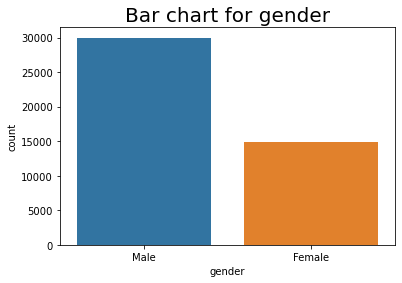

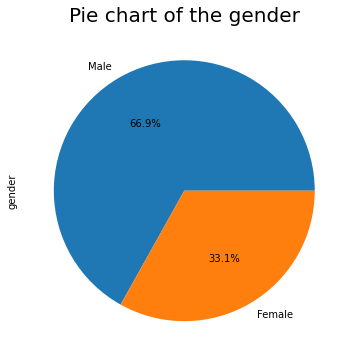

In [38]:
#Countplot
sns.countplot(df['gender'])
plt.title("Bar chart for gender", y=1, fontdict={"fontsize": 20})
plt.figure(figsize=(6,6))
df.gender.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the gender',{'fontsize':20})
plt.show()

# Education

In [39]:
df['education'].value_counts()

HS-grad         14487
Some-college     9974
Bachelors        7352
Masters          2452
Assoc-voc        1863
11th             1681
Assoc-acdm       1480
10th             1276
7th-8th           874
Prof-school       763
9th               694
12th              598
Doctorate         546
5th-6th           471
1st-4th           224
Preschool          76
Name: education, dtype: int64

In [40]:
df['education'].value_counts(),df['educational-num'].value_counts()

(HS-grad         14487
 Some-college     9974
 Bachelors        7352
 Masters          2452
 Assoc-voc        1863
 11th             1681
 Assoc-acdm       1480
 10th             1276
 7th-8th           874
 Prof-school       763
 9th               694
 12th              598
 Doctorate         546
 5th-6th           471
 1st-4th           224
 Preschool          76
 Name: education, dtype: int64,
 9     14487
 10     9974
 13     7352
 14     2452
 11     1863
 7      1681
 12     1480
 6      1276
 4       874
 15      763
 5       694
 8       598
 16      546
 3       471
 2       224
 1        76
 Name: educational-num, dtype: int64)

Education column has many unique values and it is harder to understand. Since it many, It is better to arranged it meaningfully so I am going to group it for easy and clear understanding. Also IEducation and Education-num column contain same values in amount

# FeaturenEngineering

In [41]:
Elementary =['Preschool','1st-4th']
School = ['5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','School']
Bachelors=['Some-college','Bachelors','Assoc-voc','Assoc-acdm','Prof-school']


In [42]:
# replace elements in list.
df['education'].replace(to_replace = School,value = 'School',inplace = True)
df['education'].replace(to_replace = Elementary,value = 'Elementary',inplace = True)
df['education'].replace(to_replace = Bachelors,value = 'Bachelors',inplace = True)



In [43]:
df['education'].value_counts()

Bachelors     21432
School        20081
Masters        2452
Doctorate       546
Elementary      300
Name: education, dtype: int64

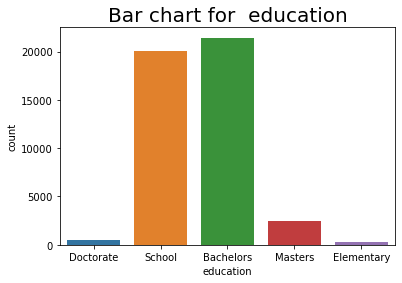

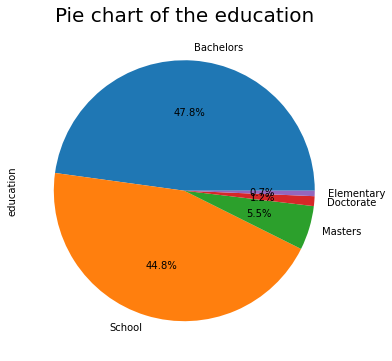

In [44]:
#Countplot
sns.countplot(df['education'])
plt.title("Bar chart for  education", y=1, fontdict={"fontsize": 20})
plt.figure(figsize=(6,6))
df.education.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the education',{'fontsize':20})
plt.show()

In [45]:
df['marital-status'].value_counts()

Married-civ-spouse       20538
Never-married            14781
Divorced                  6096
Separated                 1401
Widowed                   1384
Married-spouse-absent      578
Married-AF-spouse           33
Name: marital-status, dtype: int64

Marital-Status column has many diffrent values, which are not give that much meaningful. So again, let's do grouping to give clear picture.

In [46]:
Married =['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent']
Separated = ['Divorced','Divorced']

In [47]:
# replace elements in list.
df['marital-status'].replace(to_replace = Married,value = 'Married',inplace = True)
df['marital-status'].replace(to_replace = Separated,value = 'Separated',inplace = True)

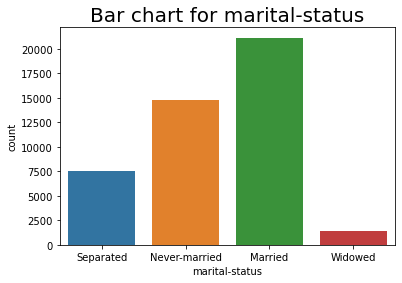

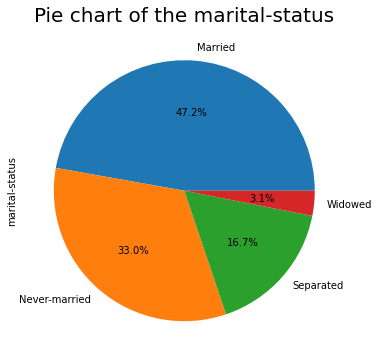

In [48]:
#Countplot
sns.countplot(df['marital-status'])
plt.title("Bar chart for marital-status", y=1, fontdict={"fontsize": 20})
plt.figure(figsize=(6,6))
df['marital-status'].value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the marital-status',{'fontsize':20})
plt.show()

In [49]:
df['native-country'].value_counts()

United-States                 40977
Mexico                          885
Philippines                     275
Germany                         191
Puerto-Rico                     172
Canada                          162
El-Salvador                     149
India                           136
Cuba                            126
China                           115
England                         111
South                           107
Jamaica                         100
Dominican-Republic               98
Italy                            97
Japan                            83
Poland                           80
Columbia                         78
Guatemala                        78
Vietnam                          77
Haiti                            72
Portugal                         62
Taiwan                           61
Iran                             52
Nicaragua                        49
Greece                           45
Ecuador                          44
Peru                        

Native_country has many observation. frequency of United-States is more lot compare to other country. So for easy of use, can devided into two main classes, which are usa and other  

In [50]:
df['native-country'].loc[df['native-country'] == 'United-States'] = 'usa'
df['native-country'].loc[df['native-country'] != 'usa'] = 'other_country'
df['native-country'].value_counts()

usa              40977
other_country     3834
Name: native-country, dtype: int64

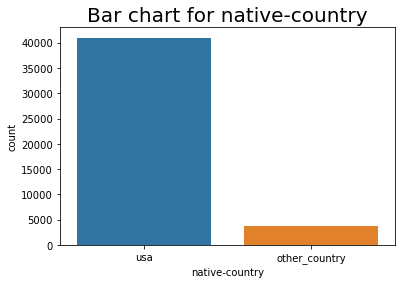

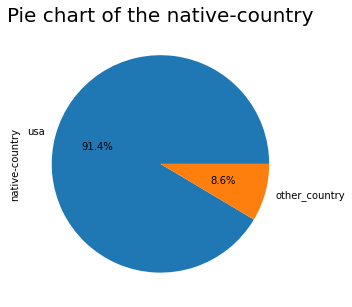

In [51]:
#Countplot
sns.countplot(df['native-country'])
plt.title("Bar chart for native-country", y=1, fontdict={"fontsize": 20})
plt.figure(figsize=(5,5))
df['native-country'].value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the native-country',{'fontsize':20})
plt.show()

In [52]:
df['occupation'].value_counts()

Craft-repair         8137
Prof-specialty       5630
Exec-managerial      5608
Adm-clerical         5128
Sales                5071
Other-service        4531
Machine-op-inspct    2778
Transport-moving     2169
Handlers-cleaners    1903
Farming-fishing      1371
Tech-support         1343
Protective-serv       901
Priv-house-serv       227
Armed-Forces           14
Name: occupation, dtype: int64

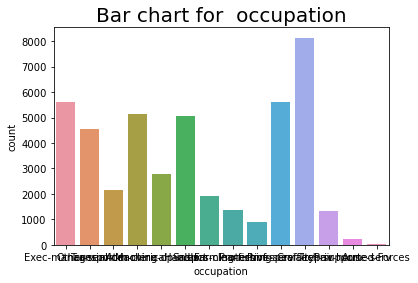

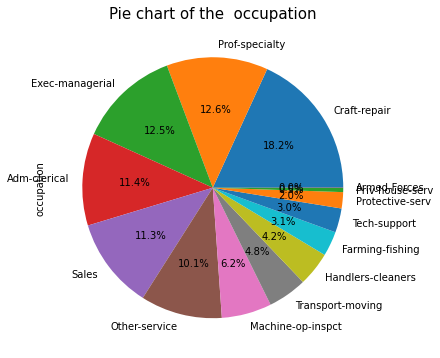

In [53]:
#Countplot
sns.countplot(df['occupation'])
plt.title("Bar chart for  occupation", y=1, fontdict={"fontsize": 20})
plt.figure(figsize=(6,6))
df.occupation.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the  occupation',{'fontsize':15})
plt.show()

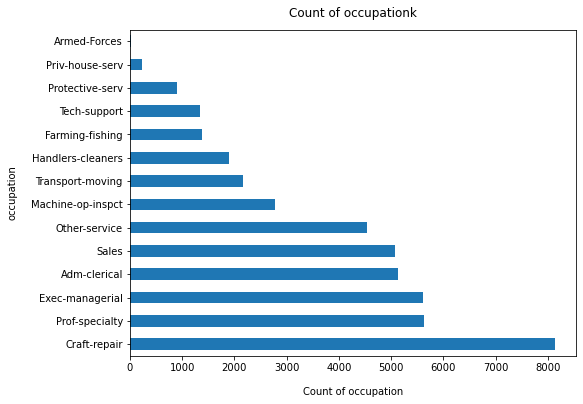

In [54]:
df['occupation'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count of occupation", labelpad=14)
plt.ylabel("occupation", labelpad=14)
plt.title("Count of occupationk", y=1.02);

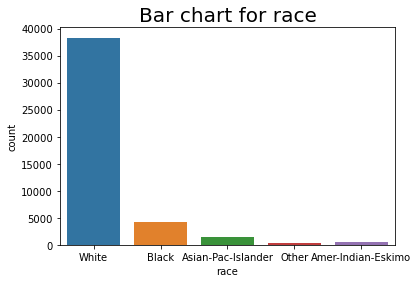

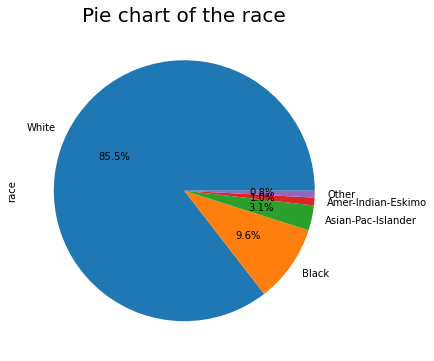

In [55]:
#Countplot
sns.countplot(df['race'])
plt.title("Bar chart for race", y=1, fontdict={"fontsize": 20})
plt.figure(figsize=(6,6))
df.race.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the race',{'fontsize':20})
plt.show()

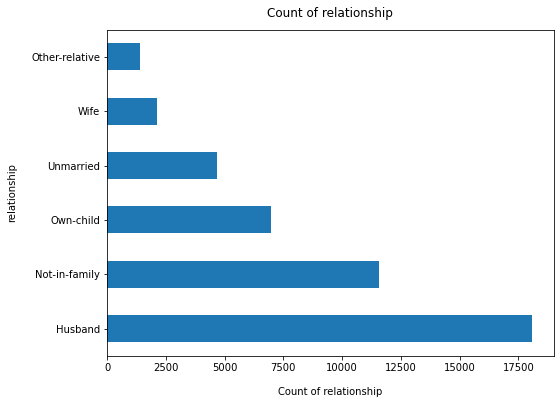

In [56]:
df['relationship'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count of relationship", labelpad=14)
plt.ylabel("relationship", labelpad=14)
plt.title("Count of relationship", y=1.02);

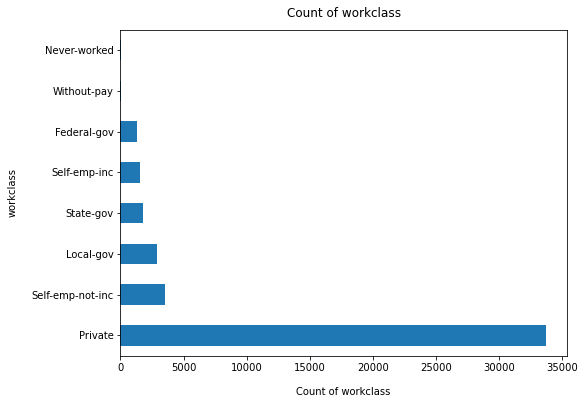

In [57]:
df['workclass'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count of workclass", labelpad=14)
plt.ylabel("workclass", labelpad=14)
plt.title("Count of workclass", y=1.02);

# Checking Relationship between two categorical variables

The Null and Alternate Hypotheses

Checking relationship between two categorical variable is not my focuss, still getting know is give extra knowledge of a variable behavior in a dataset.
I am interested in knowing if there is any relationship between two categorical varieables. In order to find that, I have to do the Chi-squared test. For that, let's state our null hypothesis and the alternative hypothesis

H0:There is no statistically significant relationship between Term and Loan Status.

Ha:There is a statistically significant relationship between Term and Loan Status. 

In [58]:
contingency_table1 = pd.crosstab(df['education'],df['marital-status'],margins = True)
contingency_table1

marital-status,Married,Never-married,Separated,Widowed,All
education,,,,,
Bachelors,10007,7592,3397,436,21432
Doctorate,383,93,57,13,546
Elementary,165,78,31,26,300
Masters,1437,585,373,57,2452
School,9157,6433,3639,852,20081
All,21149,14781,7497,1384,44811


In [59]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False

    print(exp_val)
    print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)

    if p_val < 0.05:# consider significan level is 5%
        print("\nThere is some correlation between the two variables at significance level 0.05")
    else:
        print("\nThere is no correlation between the two variables")

In [60]:
chi_square("education",'marital-status')

[[1.01150469e+04 7.06938903e+03 3.58563085e+03 6.61933186e+02]
 [2.57690165e+02 1.80099217e+02 9.13472585e+01 1.68633594e+01]
 [1.41588003e+02 9.89556136e+01 5.01908014e+01 9.26558211e+00]
 [1.15724594e+03 8.08797215e+02 4.10226150e+02 7.57306911e+01]
 [9.47742896e+03 6.62375892e+03 3.35960494e+03 6.20207181e+02]]

Chi-square is : 553.313244 

p_value is : 0.000000 

degree of freedom is : 12

There is some correlation between the two variables at significance level 0.05


<AxesSubplot:title={'center':'count of workclass'}>

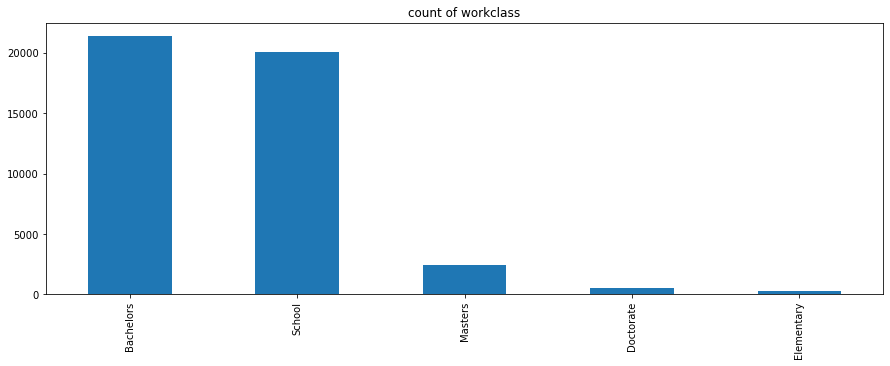

In [61]:
df['education'].value_counts().plot.bar(y='marital-status',figsize=[15,5],title='count of workclass')

<AxesSubplot:xlabel='education', ylabel='Count'>

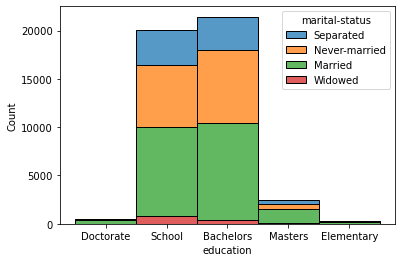

In [62]:
sns.histplot(binwidth=5, x="education", hue="marital-status", data=df, stat="count", multiple="stack")

In [63]:
chi_square("education",'race')

[[2.06136708e+02 6.64802839e+02 2.05993225e+03 1.80788110e+02
  1.83203401e+04]
 [5.25152306e+00 1.69364665e+01 5.24786771e+01 4.60574413e+00
  4.66727589e+02]
 [2.88545223e+00 9.30575082e+00 2.88344380e+01 2.53062864e+00
  2.56443730e+02]
 [2.35837629e+01 7.60590034e+01 2.35673473e+02 2.06836714e+01
  2.09600009e+03]
 [1.93142554e+02 6.22895941e+02 1.93008116e+03 1.69391846e+02
  1.71654885e+04]]

Chi-square is : 458.338816 

p_value is : 0.000000 

degree of freedom is : 16

There is some correlation between the two variables at significance level 0.05


<AxesSubplot:xlabel='education', ylabel='Count'>

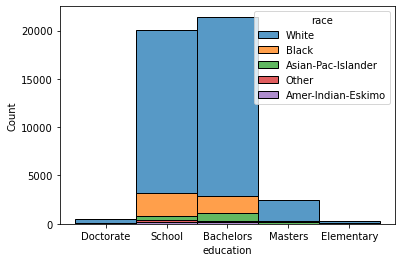

In [64]:
sns.histplot(binwidth=5, x="education", hue="race", data=df, stat="count", multiple="stack")

In [65]:
chi_square("marital-status",'occupation')

[[2.42021093e+03 6.60744014e+00 3.84033860e+03 2.64675174e+03
  6.47057173e+02 8.98139899e+02 1.31110491e+03 2.13845080e+03
  1.07134922e+02 2.65713486e+03 4.25235969e+02 2.39330921e+03
  6.33842293e+02 1.02368126e+03]
 [1.69148129e+03 4.61792863e+00 2.68400609e+03 1.84981027e+03
  4.52227154e+02 6.27708442e+02 9.16328982e+02 1.49455962e+03
  7.48764143e+01 1.85706701e+03 2.97196693e+02 1.67267972e+03
  4.42991297e+02 7.15449086e+02]
 [8.57928098e+02 2.34223740e+00 1.36134184e+03 9.38233380e+02
  2.29371962e+02 3.18376983e+02 4.64766821e+02 7.58048403e+02
  3.79777064e+01 9.41914039e+02 1.50739707e+02 8.48391846e+02
  2.24687487e+02 3.62879494e+02]
 [1.58379684e+02 4.32393832e-01 2.51313472e+02 1.73204615e+02
  4.23437102e+01 5.87746759e+01 8.57992904e+01 1.39941175e+02
  7.01095713e+00 1.73884091e+02 2.78276316e+01 1.56619223e+02
  4.14789226e+01 6.69901587e+01]]

Chi-square is : 3563.703992 

p_value is : 0.000000 

degree of freedom is : 39

There is some correlation between the two

In [66]:
chi_square("native-country",'occupation')

[[4.38748343e+02 1.19783089e+00 6.96196425e+02 4.79816831e+02
  1.17301868e+02 1.62819442e+02 2.37683872e+02 3.87669412e+02
  1.94219723e+01 4.81699136e+02 7.70889737e+01 4.33871460e+02
  1.14906206e+02 1.85578229e+02]
 [4.68925166e+03 1.28021691e+01 7.44080358e+03 5.12818317e+03
  1.25369813e+03 1.74018056e+03 2.54031613e+03 4.14333059e+03
  2.07578028e+02 5.14830086e+03 8.23911026e+02 4.63712854e+03
  1.22809379e+03 1.98342177e+03]]

Chi-square is : 532.590064 

p_value is : 0.000000 

degree of freedom is : 13

There is some correlation between the two variables at significance level 0.05


In [67]:
chi_square("relationship",'occupation')

[[2.07049394e+03 5.65267457e+00 3.28541521e+03 2.26429993e+03
  5.53558345e+02 7.68359979e+02 1.12165214e+03 1.82944775e+03
  9.16540805e+01 2.27318270e+03 3.63789985e+02 2.04747948e+03
  5.42252996e+02 8.75760795e+02]
 [1.32208127e+03 3.60942626e+00 2.09785010e+03 1.44583303e+03
  3.53465957e+02 4.90624155e+02 7.16213296e+02 1.16816503e+03
  5.85242686e+01 1.45150499e+03 2.32292361e+02 1.30738575e+03
  3.46247105e+02 5.59203254e+02]
 [1.58379684e+02 4.32393832e-01 2.51313472e+02 1.73204615e+02
  4.23437102e+01 5.87746759e+01 8.57992904e+01 1.39941175e+02
  7.01095713e+00 1.73884091e+02 2.78276316e+01 1.56619223e+02
  4.14789226e+01 6.69901587e+01]
 [7.96361429e+02 2.17415367e+00 1.26364917e+03 8.70903841e+02
  2.12911763e+02 2.95529602e+02 4.31414206e+02 7.03649305e+02
  3.52523488e+01 8.74320368e+02 1.39922318e+02 7.87509518e+02
  2.08563455e+02 3.36838522e+02]
 [5.36705720e+02 1.46526523e+00 8.51633081e+02 5.86943384e+02
  1.43491330e+02 1.99171409e+02 2.90750485e+02 4.74222624e+02


In [68]:
chi_square("gender",'occupation')

[[1.69800415e+03 4.63573676e+00 2.69435643e+03 1.85694370e+03
  4.53971079e+02 6.30129075e+02 9.19862623e+02 1.50032309e+03
  7.51651603e+01 1.86422843e+03 2.98342773e+02 1.67913008e+03
  4.44699605e+02 7.18208074e+02]
 [3.42999585e+03 9.36426324e+00 5.44264357e+03 3.75105630e+03
  9.17028921e+02 1.27287092e+03 1.85813738e+03 3.03067691e+03
  1.51834840e+02 3.76577157e+03 6.02657227e+02 3.39186992e+03
  8.98300395e+02 1.45079193e+03]]

Chi-square is : 6885.119294 

p_value is : 0.000000 

degree of freedom is : 13

There is some correlation between the two variables at significance level 0.05


Text(0.5, 1.0, 'Education And Income difference')

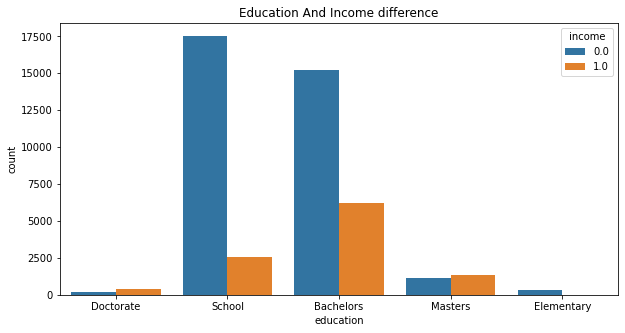

In [69]:
fig, ax = plt.subplots()
sns.countplot(x ='education',data=df,hue='income',ax=ax)
fig.set_size_inches(10,5)
plt.title('Education And Income difference')

# Comparing some categorical variable withTarget Variable: income_>50K

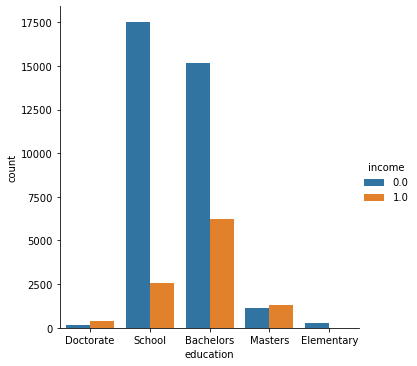

In [70]:
sns.catplot(x='education',hue='income',data=df,kind="count")

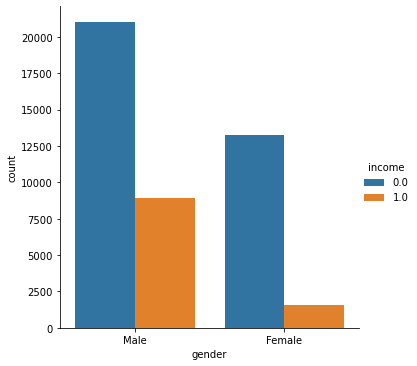

In [71]:
sns.catplot(x='gender',hue='income',data=df,kind="count")

<AxesSubplot:xlabel='occupation'>

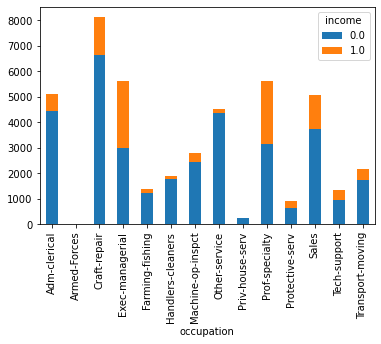

In [72]:
pd.crosstab(df['occupation'],df['income']).plot.bar(stacked=True)

<AxesSubplot:xlabel='race'>

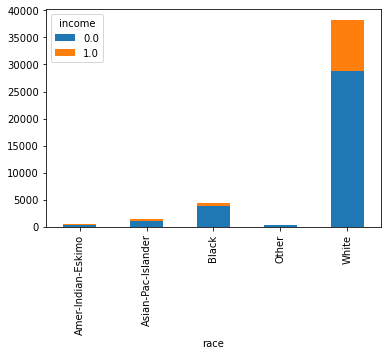

In [73]:
pd.crosstab(df['race'],df['income']).plot.bar(stacked=True)

# Finding Numerical Column

In [74]:
df_num=df.select_dtypes(exclude='object')
df_num.columns

Index(['age', 'capital-gain', 'capital-loss', 'educational-num', 'fnlwgt',
       'hours-per-week', 'income'],
      dtype='object')

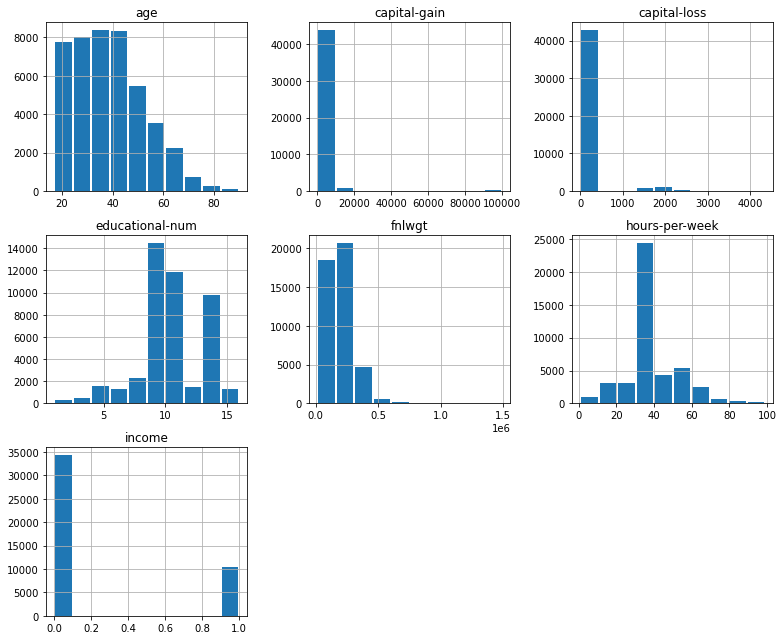

In [75]:
df.hist(rwidth=0.9,figsize=(11,9))
plt.tight_layout()

Let's go through the columns one by one 

# Univarieate Analysis and Visualization for Numerical columns

# Target Column: income

In [76]:
df['income'].value_counts()


0.0    34298
1.0    10513
Name: income, dtype: int64

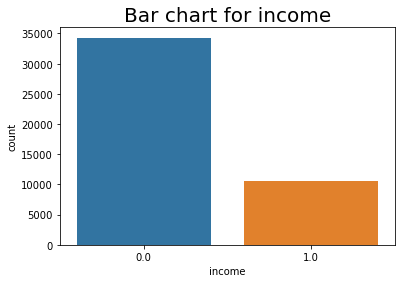

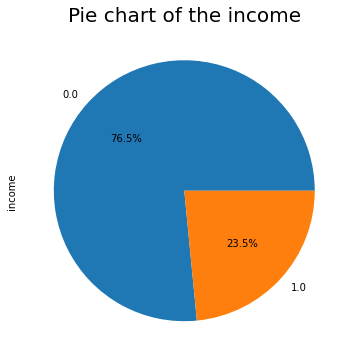

In [77]:
#Countplot
sns.countplot(df['income'])
plt.title("Bar chart for income", y=1, fontdict={"fontsize": 20})
plt.figure(figsize=(6,6))
df["income"].value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of the income',{'fontsize':20})
plt.show()

The distribution of income is imbalanced. zero values are way higher tha  one value. This would lead to class imbalance problem while fitting our models. So Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. F1 is a suitable measure of models tested with imbalance datasets.

# Finding outliers

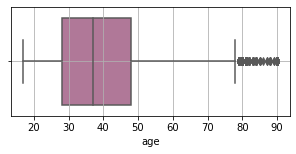

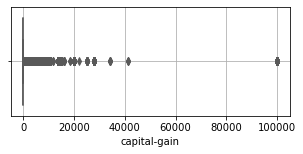

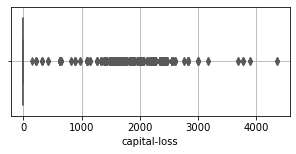

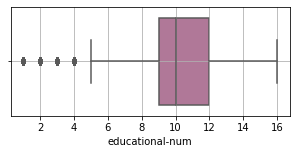

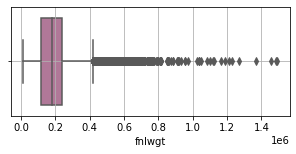

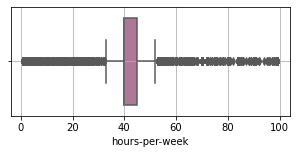

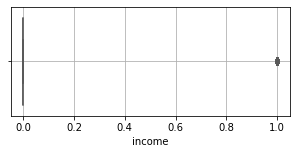

In [78]:
for column in df.select_dtypes(include= ["float64", "int64"]).columns:
  plt.figure(figsize= (5,2))
  sns.boxplot(x= df[column], color = "#b96f99")
  plt.grid(True)
  plt.show()

In [81]:
#lower inner fence: Q1 - 1.5*IQR
#upper inner fence: Q3 + 1.5*IQR
def outlier_analysis(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)#UIF=upper inner fence
    LIF=Q1-1.5*(IQR) #LIF=lower inner fence
    df_out =df[(df[col]<LIF) | (df[col]>UIF)] # I created a new data set that has just include potential outliers
    sns.distplot(df_out[col])#Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
   
    return df_out[col] .describe()

count    195.000000
mean      83.656410
std        4.282534
min       79.000000
25%       80.000000
50%       82.000000
75%       90.000000
max       90.000000
Name: age, dtype: float64

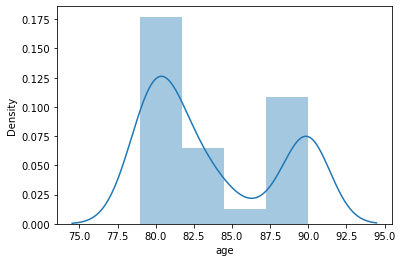

In [83]:
outlier_analysis('age')

count     3690.000000
mean     13204.580217
std      22967.340414
min        114.000000
25%       3411.000000
50%       7298.000000
75%      13550.000000
max      99999.000000
Name: capital-gain, dtype: float64

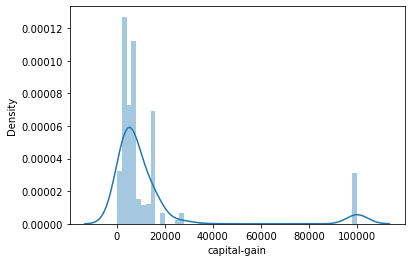

In [84]:
outlier_analysis('capital-gain')

count    2128.000000
mean     1870.148496
std       364.402440
min       155.000000
25%      1672.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: capital-loss, dtype: float64

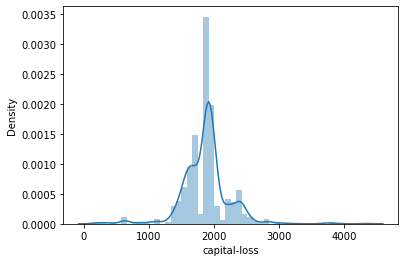

In [85]:
outlier_analysis('capital-loss')

count    1645.000000
mean        3.302736
std         0.872407
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: educational-num, dtype: float64

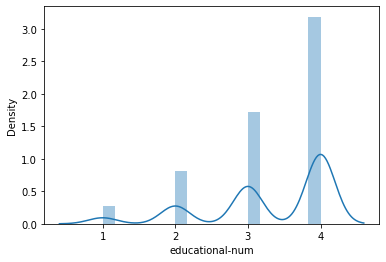

In [86]:
outlier_analysis('educational-num')

count    1.346000e+03
mean     5.155996e+05
std      1.246952e+05
min      4.180200e+05
25%      4.409428e+05
50%      4.735860e+05
75%      5.453102e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

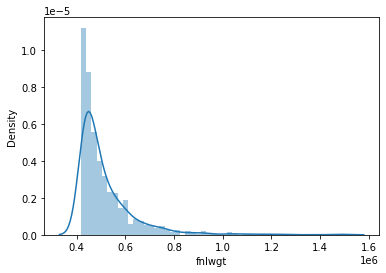

In [87]:
outlier_analysis('fnlwgt')

count    12379.000000
mean        37.449552
std         22.410832
min          1.000000
25%         20.000000
50%         30.000000
75%         60.000000
max         99.000000
Name: hours-per-week, dtype: float64

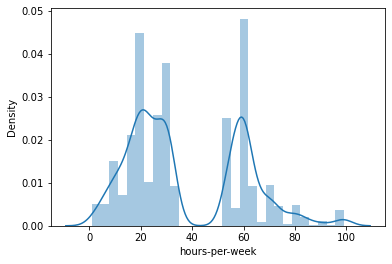

In [88]:
outlier_analysis('hours-per-week')

# Bivariate Analysis

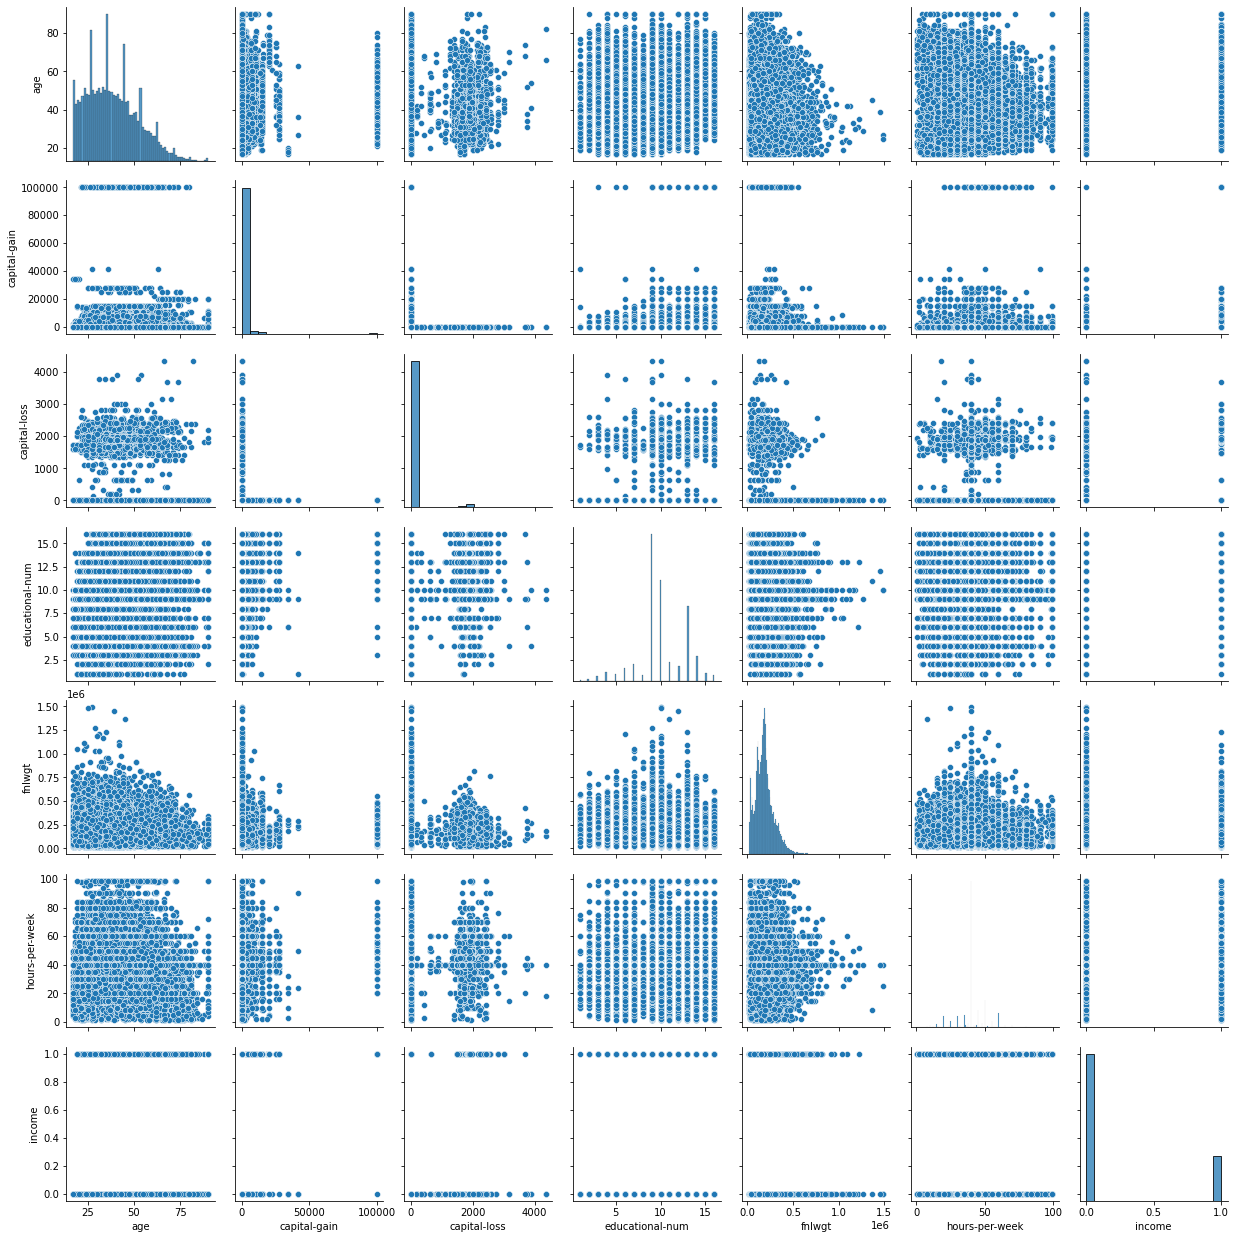

In [89]:
sns.pairplot(df)

Seaborn Pairplot uses to get the relation between each and every variable present in Pandas DataFrame. It works like a seaborn scatter plot but it plot only two variables plot and sns paiplot plot the pairwise plot of multiple features/variable in a grid format

# The statistical summary of the dataset

In [90]:
# Getting the summary of Data
pd.options.display.float_format = "{:.2f}".format
df.describe()# for numeric columns

,age,capital-gain,capital-loss,educational-num,fnlwgt,hours-per-week,income
count,44811.00,44811.00,44811.00,44811.00,44811.00,44811.00,44811.00
mean,38.62,1087.34,88.81,10.08,189762.87,40.43,0.23
std,13.72,7523.46,405.60,2.57,105816.72,12.40,0.42
min,17.00,0.00,0.00,1.00,13492.00,1.00,0.00
25%,28.00,0.00,0.00,9.00,117539.00,40.00,0.00
50%,37.00,0.00,0.00,10.00,178160.00,40.00,0.00
75%,48.00,0.00,0.00,12.00,237729.00,45.00,0.00
max,90.00,99999.00,4356.00,16.00,1490400.00,99.00,1.00


In [91]:
#finding count (number of non_missing values),unique values(or levels), top(mode) and freq(fequency of mode)
#Method 1
df.astype('object').describe().transpose()

,count,unique,top,freq
age,44811,74,36,1243
capital-gain,44811,122,0,41121
capital-loss,44811,98,0,42683
education,44811,5,Bachelors,21432
educational-num,44811,16,9,14487
fnlwgt,44811,26992,203488,20
gender,44811,2,Male,29973
hours-per-week,44811,95,40,20928
income,44811.00,2.00,0.00,34298.00
marital-status,44811,4,Married,21149


# Checking Relationship between numerical column

Text(0.5, 1.0, 'Feature Correlation Matrix for income')

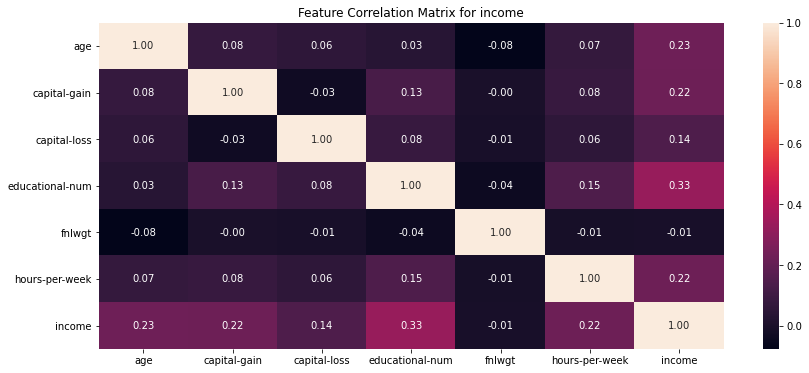

In [92]:
plt.figure(figsize = (14,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix for income')

The strongest linear relationship is indicated by a correlation coefficient of -1 or 1. The weakest linear relationship is indicated by a correlation coefficient equal to 0.

heatmap showing correlation amoung the numerical variables. It showing week correlation between the columns


In [93]:
corr_matrix = df.corr()
corr_matrix["income"].sort_values(ascending=False)

income             1.00
educational-num    0.33
age                0.23
hours-per-week     0.22
capital-gain       0.22
capital-loss       0.14
fnlwgt            -0.01
Name: income, dtype: float64

# Normalization

Normalization help to numerical column values to same scale.

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age','capital-gain','capital-loss','hours-per-week']

for i in numerical:
  df[i]-=df[i].min()
  df[i] /= df[i].max()

# Encoding

Encoding converts categorical variable into numerical charecter

In [95]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [96]:
df1=df.copy()
df1=df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,capital-gain,capital-loss,education,educational-num,fnlwgt,gender,hours-per-week,income,marital-status,native-country,occupation,race,relationship,source,workclass
0,50,121,0,1,15,24927,1,59,1,2,1,3,4,1,1,3
1,0,0,0,4,7,19684,1,14,0,1,1,7,4,3,1,3
2,14,0,0,0,12,12225,1,39,1,0,1,3,4,0,1,3
3,41,0,0,4,3,5826,1,39,0,0,1,13,4,0,1,6
4,8,0,0,0,9,9524,1,39,0,1,1,7,2,1,1,6


# Feature Selection

In [97]:
#Shuffle the rows of the dataframe
df = df.sample(frac = 1, random_state=0)

In [98]:
X = df1.drop(['income'], axis=1)
y= df1['income']

In [99]:
X.head(5)

,age,capital-gain,capital-loss,education,educational-num,fnlwgt,gender,hours-per-week,marital-status,native-country,occupation,race,relationship,source,workclass
0,50,121,0,1,15,24927,1,59,2,1,3,4,1,1,3
1,0,0,0,4,7,19684,1,14,1,1,7,4,3,1,3
2,14,0,0,0,12,12225,1,39,0,1,3,4,0,1,3
3,41,0,0,4,3,5826,1,39,0,1,13,4,0,1,6
4,8,0,0,0,9,9524,1,39,1,1,7,2,1,1,6


In [100]:
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: income, dtype: int64

In [101]:
y.value_counts() 

0    34298
1    10513
Name: income, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.30)

70% of data splited as Train and 20% of data goes to test set

In [103]:
X_test.head()

,age,capital-gain,capital-loss,education,educational-num,fnlwgt,gender,hours-per-week,marital-status,native-country,occupation,race,relationship,source,workclass
33352,22,0,0,0,11,19001,0,39,2,1,9,4,1,1,6
29316,14,0,0,0,9,666,0,19,2,1,2,4,4,1,3
39640,26,0,0,0,10,25079,1,39,0,1,2,4,0,1,3
19573,35,111,0,0,14,12168,1,59,0,1,9,4,0,1,4
6672,37,0,0,0,9,9684,1,59,2,1,6,4,1,1,3


In [104]:
y_test.head()

33352    0
29316    0
39640    0
19573    1
6672     0
Name: income, dtype: int64

# Modeling

# Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
#Defining Model
model = LogisticRegression(solver='newton-cg')
model.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [107]:
cross_val_score(LogisticRegression(),X,y,cv=4).mean()

0.8024368281489372

In [108]:
model.intercept_ #b0

array([-12.1943074])

In [109]:
model.coef_ #coefficients of the features, b1, b2, ...

array([[ 4.00616602e-02,  2.82700751e-02,  2.72392853e-02,
        -1.79014061e-02,  3.38795706e-01,  1.08753662e-05,
         3.82864941e-01,  3.42436540e-02, -1.33443156e+00,
         1.83927952e-01,  5.50113742e-03,  1.31758359e-01,
         4.65873658e-02,  5.01830403e+00, -1.11572724e-01]])

In [110]:
# Predicting the values for x-test
y_pred = model.predict(X_test)

In [111]:
#finding the training and testing accuracy
print ("Training Accuracy: ",model.score(X_train,y_train))
print ("Testing Accuracy: ",model.score(X_test,y_test))

Training Accuracy:  0.8414894634488476
Testing Accuracy:  0.8382921749479322


In [112]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90     10294
           1       0.71      0.52      0.60      3150

    accuracy                           0.84     13444
   macro avg       0.79      0.73      0.75     13444
weighted avg       0.83      0.84      0.83     13444



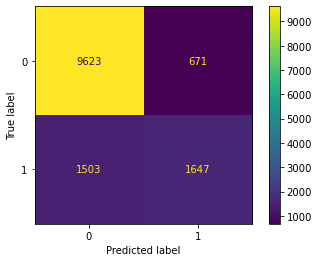

In [114]:
plot_confusion_matrix(model,X_test,y_test)

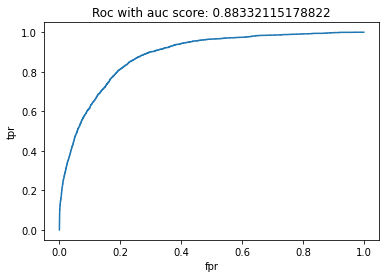

In [115]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()


# NNN

In [116]:
#import the knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [117]:
#see the cross_validated score for cv=3
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X,y,cv=3).mean()

0.780835062819397

In [118]:
#for no.of neighbors from 1 - 10, graph the k-fold scores
scores = []
for i in range(1,11,1):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,X,y,cv=3).mean())

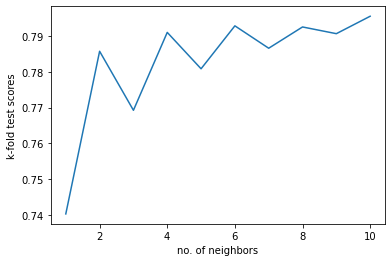

In [119]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()


In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
#Training the model.
knn.fit(X_train, y_train)
#Predict test data set.
y_pred = knn.predict(X_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86     10294
           1       0.53      0.35      0.42      3150

    accuracy                           0.78     13444
   macro avg       0.68      0.63      0.64     13444
weighted avg       0.75      0.78      0.76     13444



0.6274493078106833

# Using Hyperparameter

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

# DecisionTree

In [121]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(X_train, y_train)


dtc_acc= accuracy_score(y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,dtc.predict(X_test))*100))

Train Set Accuracy:85.18187904485606
Test Set Accuracy:84.3498958643261


# GradientBoostingClassifier

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)


gbc_acc=accuracy_score(y_test,gbc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,gbc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,gbc.predict(X_test))*100))

Train Set Accuracy:87.06283673924825
Test Set Accuracy:86.50699196667658


# SVM

In [123]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)    

svm_acc= accuracy_score(y_test,svm.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,svm.predict(X_test))*100))

Train Set Accuracy:76.52628558676315
Test Set Accuracy:76.56947337102052


Observations:
Logistic Regression : 83.83%
KNN: 78%
Decision Trees: 84.71%
GradianBoost Classifier: 86.75.49%
SVM: 76.38%


Conclusion


Throughout this project, I did classification analysis from end-to-end and learned and obtained several insights about classification models and the keys is to develop one with a good performance. from my Observation All models have pretty good score compared to svm model. which means, all models are good in performance.


